In [83]:
# Mengimpor pustaka yang diperlukan untuk analisis data dan pemodelan pembelajaran mesin
import pandas as pd            # Untuk manipulasi dan analisis data (DataFrame).
import numpy as np             # Untuk operasi numerik dan manipulasi array.
import matplotlib.pyplot as plt # Untuk membuat visualisasi grafik.
import seaborn as sns          # Untuk visualisasi data yang lebih menarik dengan gaya statistik.
import tensorflow as tf        # Untuk membangun dan melatih model pembelajaran mesin menggunakan TensorFlow.
from sklearn.model_selection import train_test_split # Untuk membagi dataset menjadi data latih (training) dan data uji (testing).
from sklearn.preprocessing import StandardScaler      # Untuk normalisasi atau standardisasi data numerik.
from sklearn.preprocessing import LabelEncoder         # Untuk mengubah data kategorikal menjadi data numerik.

# Mengaktifkan grafik inline di Jupyter Notebook (grafik ditampilkan langsung dalam notebook).
%matplotlib inline

# Mengatur gaya visualisasi seaborn dengan background putih dan grid untuk grafik yang lebih jelas.
sns.set_style('whitegrid')


Data Collection, Cleaning, dan Augmentation

In [84]:
# Menentukan lokasi file CSV yang akan dibaca
loc = 'C:/Users/Widnyana/Documents/MSIB x SMT 5/CAPSTONEEEEEEEEEEEEEEEE/tabular/dataset/mental_health_disorder_symptoms_ver2.csv'

# Membaca file CSV dan memuatnya ke dalam DataFrame 'data_tabular'
# Fungsi pd.read_csv() digunakan untuk membaca data dari file CSV
# 'loc' adalah path atau lokasi file CSV yang berisi dataset

data_tabular = pd.read_csv(loc)


In [85]:
# Menyimpan DataFrame 'data_tabular' ke dalam file Excel dengan nama 'data_tabular.xlsx'
# Fungsi to_excel() digunakan untuk mengekspor DataFrame ke dalam format file Excel (.xlsx)

data_tabular.to_excel('data_tabular.xlsx')


In [86]:
# Menampilkan 5 baris pertama dari dataset
# Fungsi head() akan menampilkan lima baris pertama secara default, memberikan gambaran tentang data awal dalam dataset

data_tabular.head()


,ag+1:629e,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,having.trouble.in.sleeping,having.trouble.with.work,hopelessness,anger,...,having.nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy,Disorder
0,23,1,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,MDD
1,14,1,0,1,0,0,1,0,0,1,...,1,1,0,0,0,0,1,0,0,ASD
2,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Loneliness
3,29,1,0,0,0,1,1,0,0,0,...,0,0,0,1,1,0,0,0,1,bipolar
4,32,1,1,1,1,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,anexiety


In [87]:
# Menggunakan loop untuk iterasi melalui setiap kolom dalam dataset
# Setiap kolom akan diperiksa untuk nilai unik yang terdapat di dalamnya

for column in data_tabular.columns:
    # Menampilkan nama kolom dan nilai unik yang ada dalam kolom tersebut
    print(f"Unique values in '{column}':")
    # Menampilkan nilai unik yang ada dalam kolom tertentu menggunakan .unique()
    print(data_tabular[column].unique())
    # Menambahkan baris kosong setelah menampilkan nilai unik untuk memisahkan setiap kolom
    print("\n")


Unique values in 'ag+1:629e':
[23 14 25 29 32 40 18 24 37  4 27 15 19 12 21 35 26 28 17 31 20 16 43 42
  7 13  9 30 36 11 41 46 10]


Unique values in 'feeling.nervous':
[1 0]


Unique values in 'panic':
[0 1]


Unique values in 'breathing.rapidly':
[1 0]


Unique values in 'sweating':
[0 1]


Unique values in 'trouble.in.concentration':
[0 1]


Unique values in 'having.trouble.in.sleeping':
[1 0]


Unique values in 'having.trouble.with.work':
[0 1]


Unique values in 'hopelessness':
[1 0]


Unique values in 'anger':
[0 1]


Unique values in 'over.react':
[0 1]


Unique values in 'change.in.eating':
[0 1]


Unique values in 'suicidal.thought':
[1 0]


Unique values in 'feeling.tired':
[0 1]


Unique values in 'close.friend':
[1 0]


Unique values in 'social.media.addiction':
[0 1]


Unique values in 'weight.gain':
[0 1]


Unique values in 'introvert':
[0 1]


Unique values in 'popping.up.stressful.memory':
[1 0]


Unique values in 'having.nightmares':
[0 1]


Unique values in 'avoids.p

In [88]:
# Menampilkan informasi umum tentang dataset
# Fungsi .info() memberikan gambaran umum tentang struktur DataFrame,
# termasuk jumlah total entri, jumlah kolom, jenis data pada setiap kolom, serta jumlah nilai non-null di setiap kolom

data_tabular.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ag+1:629e                    637 non-null    int64 
 1   feeling.nervous              637 non-null    int64 
 2   panic                        637 non-null    int64 
 3   breathing.rapidly            637 non-null    int64 
 4   sweating                     637 non-null    int64 
 5   trouble.in.concentration     637 non-null    int64 
 6   having.trouble.in.sleeping   637 non-null    int64 
 7   having.trouble.with.work     637 non-null    int64 
 8   hopelessness                 637 non-null    int64 
 9   anger                        637 non-null    int64 
 10  over.react                   637 non-null    int64 
 11  change.in.eating             637 non-null    int64 
 12  suicidal.thought             637 non-null    int64 
 13  feeling.tired                637 no

In [89]:
# Mengubah nama kolom dalam dataset untuk memperbaiki kesalahan penamaan atau memberikan nama yang lebih deskriptif
# Fungsi rename() digunakan untuk mengganti nama kolom. Dalam hal ini, kolom dengan nama yang kurang jelas diganti dengan nama yang lebih deskriptif

data_tabular = data_tabular.rename(columns={
    'ag+1:629e': 'age',                     # Mengganti nama kolom 'ag+1:629e' menjadi 'age'
    'having.trouble.in.sleeping': 'trouble.sleeping',  # Mengganti nama kolom 'having.trouble.in.sleeping' menjadi 'trouble.sleeping'
    'having.trouble.with.work': 'trouble.with.work',  # Mengganti nama kolom 'having.trouble.with.work' menjadi 'trouble.with.work'
    'having.nightmares': 'nightmares'        # Mengganti nama kolom 'having.nightmares' menjadi 'nightmares'
})

# Mengatur kolom 'age' sebagai index dataframe
# Fungsi set_index() digunakan untuk mengatur kolom sebagai index dataframe
# Dalam hal ini, kolom 'age' akan menjadi index, yang berarti kolom ini tidak lagi menjadi bagian dari data tetapi digunakan untuk indexing
data_tabular = data_tabular.set_index(['age'])


In [90]:
# Mengubah nama kolom 'blamming.yourself' menjadi 'blaming.yourself' dalam dataset
# Fungsi rename() digunakan untuk mengganti nama kolom dalam dataframe.
# { 'blamming.yourself':'blaming.yourself' } adalah dictionary yang mendefinisikan perubahan nama kolom
# axis=1 menunjukkan bahwa kita ingin mengganti nama kolom (bukan baris)

data_tabular = data_tabular.rename({'blamming.yourself':'blaming.yourself'}, axis=1)

# Menampilkan daftar nama kolom setelah perubahan
data_tabular.columns


Index(['feeling.nervous', 'panic', 'breathing.rapidly', 'sweating',
       'trouble.in.concentration', 'trouble.sleeping', 'trouble.with.work',
       'hopelessness', 'anger', 'over.react', 'change.in.eating',
       'suicidal.thought', 'feeling.tired', 'close.friend',
       'social.media.addiction', 'weight.gain', 'introvert',
       'popping.up.stressful.memory', 'nightmares',
       'avoids.people.or.activities', 'feeling.negative',
       'trouble.concentrating', 'blaming.yourself', 'hallucinations',
       'repetitive.behaviour', 'seasonally', 'increased.energy', 'Disorder'],
      dtype='object')

In [91]:
# Mengecek apakah ada baris yang mengandung nilai null (NaN) dalam dataset
# data_tabular.isna() menghasilkan DataFrame boolean yang menunjukkan apakah nilai dalam dataset adalah NaN (null)

# .any(axis=1) memeriksa sepanjang baris (axis=1) dan mengembalikan True jika ada nilai NaN dalam baris tersebut
# Artinya, jika ada nilai null di salah satu kolom pada baris tersebut, maka baris tersebut dianggap sebagai baris yang mengandung nilai null

# data_tabular[...] akan memfilter data dan menampilkan hanya baris yang memiliki nilai null
data_tabular[data_tabular.isna().any(axis=1)]


,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,trouble.sleeping,trouble.with.work,hopelessness,anger,over.react,...,nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blaming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy,Disorder
age,,,,,,,,,,,,,,,,,,,,,


In [92]:
# Mengecek apakah ada nilai dalam kolom-kolom gejala (kolom 1 hingga 26) yang lebih besar dari 1
# data_tabular.iloc[:, 1:27] memilih subset kolom gejala (kolom 1 hingga 26) untuk analisis

# (data_tabular.iloc[:, 1:27] > 1) menghasilkan DataFrame boolean (True/False) 
# yang menunjukkan apakah nilai dalam kolom lebih besar dari 1

# .any(axis=1) memeriksa sepanjang baris (axis=1) dan mengembalikan True jika ada nilai True pada baris tersebut
# Artinya, jika ada nilai di baris tersebut yang lebih besar dari 1, maka baris tersebut dianggap sebagai anomali

# data_tabular[...] akan memfilter data dan menampilkan hanya baris yang mengandung nilai lebih besar dari 1
anomaly = data_tabular[(data_tabular.iloc[:, 1:27] > 1).any(axis=1)]

# Menampilkan baris yang mengandung nilai lebih besar dari 1 dalam kolom gejala
anomaly


,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,trouble.sleeping,trouble.with.work,hopelessness,anger,over.react,...,nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blaming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy,Disorder
age,,,,,,,,,,,,,,,,,,,,,


In [93]:
# Menghitung dan menampilkan jumlah kemunculan setiap kategori dalam kolom 'Disorder'
# value_counts() menghitung frekuensi kemunculan setiap kategori atau kelas dalam kolom 'Disorder'
# Ini memberikan gambaran tentang seberapa seimbang distribusi data dalam kolom target

print(data_tabular['Disorder'].value_counts())


ASD                     89
anexiety                67
MDD                     65
eating disorder         65
ADHD                    65
PDD                     60
PTSD                    46
Loneliness              45
bipolar                 43
sleeping disorder       34
OCD                     31
psychotic deprission    27
Name: Disorder, dtype: int64


EDA

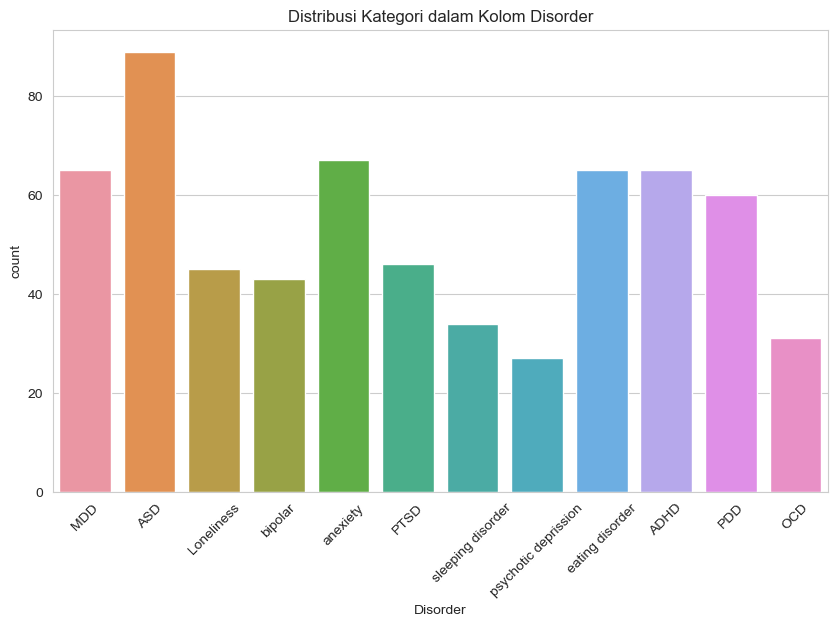

In [94]:
# Mengimpor library seaborn untuk visualisasi dan matplotlib.pyplot untuk pengaturan tampilan plot
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat figure baru dengan ukuran 10x6 inci agar plot lebih mudah dibaca
plt.figure(figsize=(10, 6))

# Menggunakan countplot dari seaborn untuk menampilkan distribusi kategori pada kolom 'Disorder'
# countplot menghitung jumlah data untuk setiap kategori dalam kolom 'Disorder' dan menampilkan sebagai grafik batang
sns.countplot(x='Disorder', data=data_tabular)

# Memberikan judul pada plot untuk menjelaskan isi dari grafik
plt.title('Distribusi Kategori dalam Kolom Disorder')

# Memutar label pada sumbu x (kategori disorder) agar tidak tumpang tindih dan lebih mudah dibaca
plt.xticks(rotation=45)

# Menampilkan plot di layar
plt.show()


In [95]:
# Menggunakan fungsi describe() untuk menghasilkan statistik deskriptif dari kolom-kolom numerik dan biner dalam dataframe
# Fungsi describe() memberikan informasi tentang distribusi nilai-nilai dalam kolom seperti:
# - count: jumlah data yang ada (non-null)
# - mean: rata-rata nilai
# - std: standar deviasi (mengukur sebaran data)
# - min: nilai minimum
# - 25%: kuartil pertama (nilai pada persentil ke-25)
# - 50%: median atau kuartil kedua (nilai pada persentil ke-50)
# - 75%: kuartil ketiga (nilai pada persentil ke-75)
# - max: nilai maksimum

print(data_tabular.describe())


       feeling.nervous       panic  breathing.rapidly    sweating  \
count       637.000000  637.000000         637.000000  637.000000   
mean          0.638932    0.273155           0.549451    0.368917   
std           0.480688    0.445930           0.497940    0.482891   
min           0.000000    0.000000           0.000000    0.000000   
25%           0.000000    0.000000           0.000000    0.000000   
50%           1.000000    0.000000           1.000000    0.000000   
75%           1.000000    1.000000           1.000000    1.000000   
max           1.000000    1.000000           1.000000    1.000000   

       trouble.in.concentration  trouble.sleeping  trouble.with.work  \
count                637.000000        637.000000         637.000000   
mean                   0.365777          0.638932           0.273155   
std                    0.482026          0.480688           0.445930   
min                    0.000000          0.000000           0.000000   
25%               

<AxesSubplot:xlabel='age', ylabel='Count'>

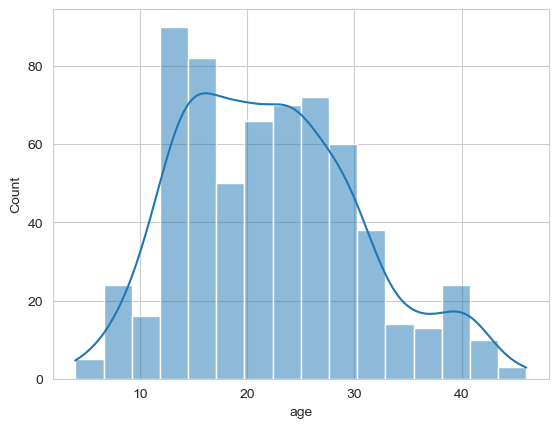

In [96]:
# Membuat histogram untuk menampilkan distribusi umur dalam dataset
# sns.histplot digunakan untuk membuat histogram, dengan opsi untuk menambahkan Kernel Density Estimate (KDE)

# Parameter data_tabular.age menunjukkan bahwa kita ingin memplot distribusi data dari kolom 'age'
# kde=True menambahkan plot KDE (Kernel Density Estimate), yang memberikan gambaran distribusi data dengan kurva halus
# Mengatur ulang indeks jika ingin mengakses kolom 'age' kembali
data_tabular = data_tabular.reset_index()

# Menampilkan grafik distribusi umur
sns.histplot(data_tabular['age'], kde=True)


<AxesSubplot:>

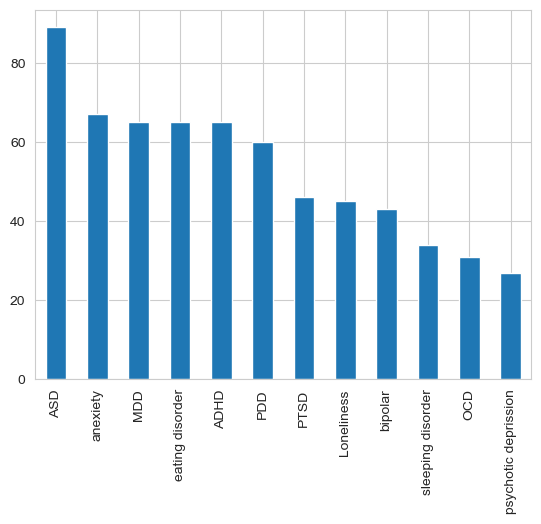

In [97]:
# Menghitung jumlah kemunculan setiap kategori dalam kolom 'Disorder' untuk mengetahui jumlah insiden gangguan
# Fungsi value_counts() menghitung frekuensi kemunculan masing-masing kategori dalam kolom 'Disorder'
incidences = data_tabular.Disorder.value_counts()

# Menampilkan grafik batang (bar plot) berdasarkan jumlah insiden untuk setiap kategori gangguan kesehatan
# incidences.plot.bar() menghasilkan grafik batang yang menunjukkan jumlah insiden untuk masing-masing gangguan
incidences.plot.bar()


In [98]:
# Menghitung jumlah gejala penyakit dengan menjumlahkan nilai pada kolom gejala tertentu dalam dataset
# data_tabular.columns[1:27] akan memilih kolom dari indeks 1 hingga 26 (kolom ke-2 hingga kolom ke-27)
# Anggaplah kolom-kolom ini berisi data gejala penyakit yang relevan

# data_tabular[data_tabular.columns[1:27]] akan memilih subset dari data yang berisi hanya kolom-kolom gejala
# Fungsi .sum() digunakan untuk menjumlahkan nilai pada setiap kolom gejala, yang menghasilkan jumlah total gejala untuk tiap penyakit
symptom_disease = data_tabular[data_tabular.columns[1:27]].sum()


<AxesSubplot:title={'center':'Gejala dari beberapa Gangguan Kesehatan Mental'}>

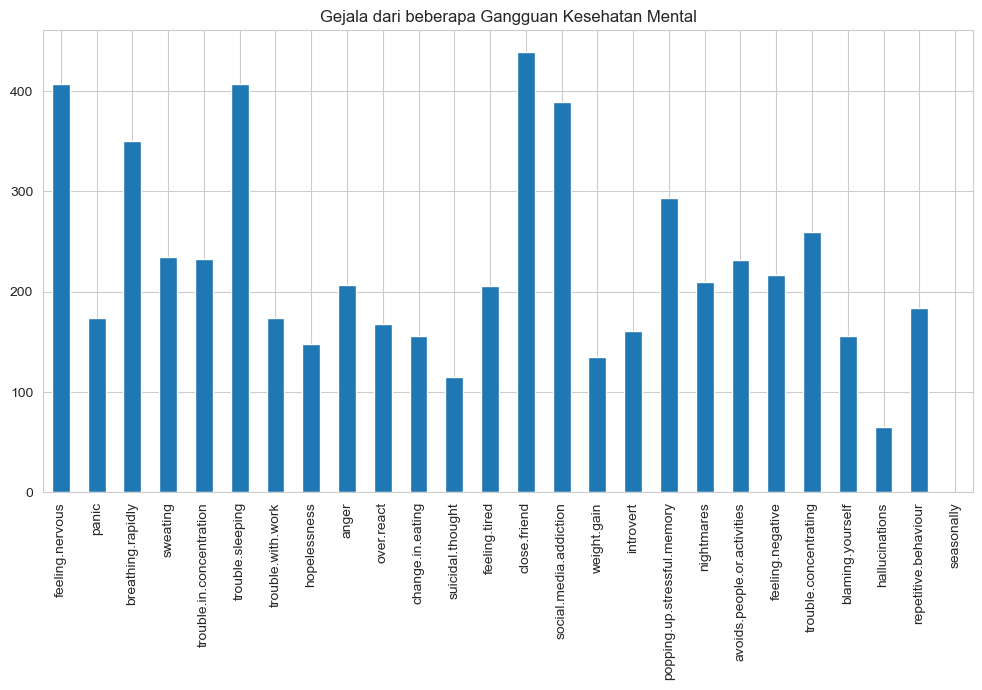

In [99]:
# Menampilkan grafik jumlah gejala penyakit dalam bentuk grafik batang (bar plot)
# symptom_disease.plot.bar() digunakan untuk membuat grafik batang berdasarkan data dalam 'symptom_disease'

# figsize=(12, 6) mengatur ukuran plot menjadi 12 inci lebar dan 6 inci tinggi
# Ini memastikan grafik cukup besar untuk menampilkan informasi secara jelas dan mudah dibaca
symptom_disease.plot.bar(figsize=(12, 6), title='Gejala dari beberapa Gangguan Kesehatan Mental')


In [100]:
# Mengambil semua nilai unik dari kolom 'Disorder' dalam dataset
# Fungsi unique() mengembalikan array yang berisi nilai-nilai yang tidak duplikat dari kolom 'Disorder'
# Ini memberikan daftar semua kategori penyakit yang ada di dalam kolom 'Disorder'
Disorders = data_tabular.Disorder.unique()

# Menampilkan nilai unik dari kolom 'Disorder' (penyakit-penyakit yang ada dalam dataset)
# Variabel 'Disorders' sekarang berisi array atau daftar kategori penyakit yang ditemukan dalam kolom 'Disorder'
Disorders


array(['MDD', 'ASD', 'Loneliness', 'bipolar', 'anexiety', 'PTSD',
       'sleeping disorder', 'psychotic deprission', 'eating disorder',
       'ADHD', 'PDD', 'OCD'], dtype=object)

In [101]:
# Mengganti nama penyakit 'psychotic deprission' menjadi 'psychot depresn' pada kolom 'Disorder'
# Fungsi str.replace() digunakan untuk mengganti substring dalam string di seluruh kolom 'Disorder'
data_tabular.Disorder = data_tabular.Disorder.str.replace('psychotic deprission', 'psychot depresn')

# Mengganti nama penyakit 'sleeping disorder' menjadi 'sleep disord' pada kolom 'Disorder'
# Ini akan memperbaiki penamaan penyakit tersebut agar lebih konsisten
data_tabular.Disorder = data_tabular.Disorder.str.replace('sleeping disorder', 'sleep disord')

# Mengganti nama penyakit 'anexiety' menjadi 'anxiety' pada kolom 'Disorder'
# Ini memperbaiki kesalahan ketik dalam penulisan 'anexiety' menjadi 'anxiety'
data_tabular.Disorder = data_tabular.Disorder.str.replace('anexiety', 'anxiety')

# Mengganti nama penyakit 'eating disorder' menjadi 'ED' pada kolom 'Disorder'
# Ini memberikan nama yang lebih singkat dan jelas untuk 'eating disorder'
data_tabular.Disorder = data_tabular.Disorder.str.replace('eating disorder', 'ED')

# Menyimpan daftar kategori unik dalam kolom 'Disorder' ke dalam variabel 'Disorders'
# Fungsi unique() mengambil semua nilai unik dalam kolom 'Disorder' dan mengembalikannya sebagai array
# Fungsi tolist() mengubah array tersebut menjadi list Python biasa
Disorders = data_tabular.Disorder.unique().tolist()


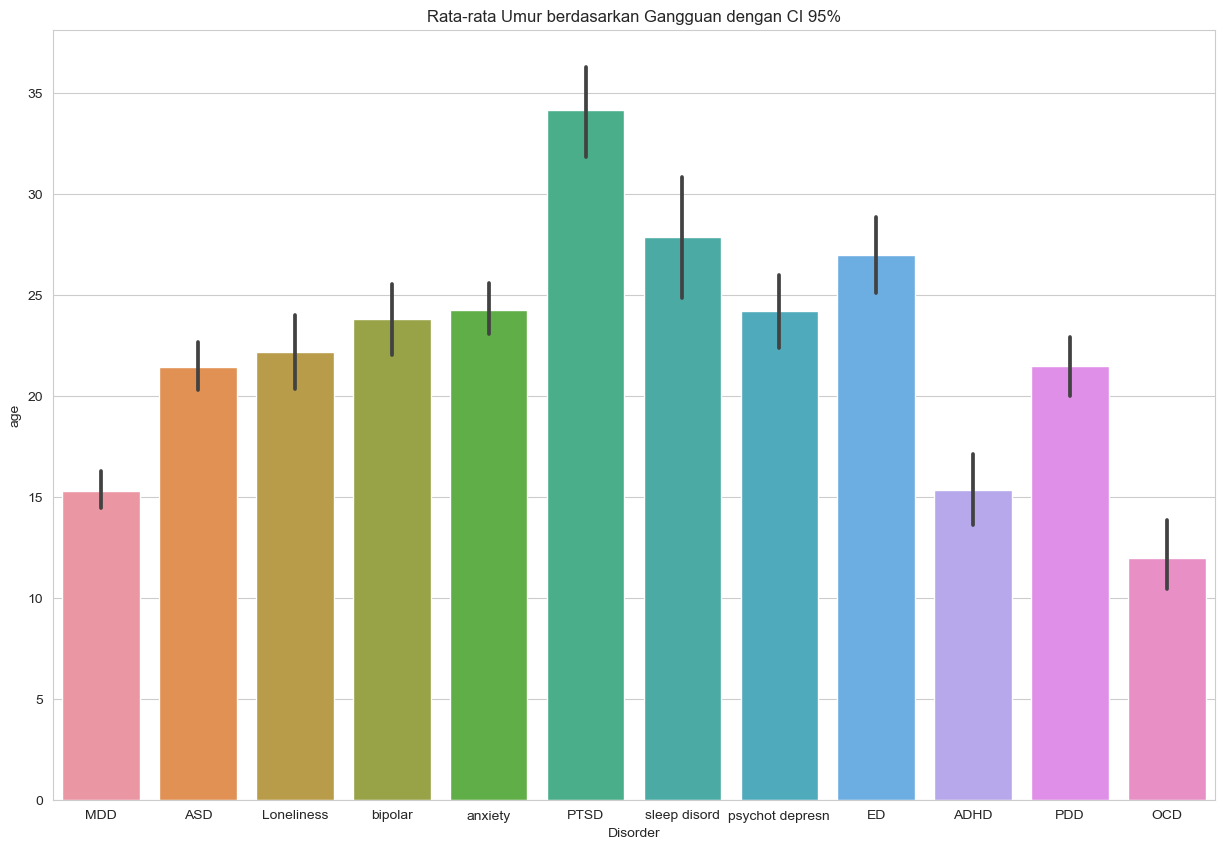

In [102]:
# Membuat sebuah figure baru dengan ukuran 15x10 inci
# Ini mengatur ukuran plot bar agar lebih besar dan mudah dibaca
plt.figure(figsize=(15, 10))

# Membuat bar plot menggunakan seaborn untuk menampilkan rata-rata umur berdasarkan kategori 'Disorder'
# Parameter data=data_tabular menunjukkan bahwa 'data_tabular' adalah sumber data
# Parameter x='Disorder' menandakan bahwa sumbu x akan menampilkan kategori penyakit ('Disorder')
# Parameter y='age' menandakan bahwa sumbu y akan menampilkan rata-rata umur untuk tiap kategori
# Parameter estimator=np.mean menentukan bahwa nilai yang diplot adalah rata-rata umur (age) untuk setiap kategori 'Disorder'
sns.barplot(data=data_tabular, x='Disorder', y='age', estimator=np.mean).set_title('Rata-rata Umur berdasarkan Gangguan dengan CI 95%')

# plt.show() digunakan untuk menampilkan plot di layar
plt.show()


<AxesSubplot:>

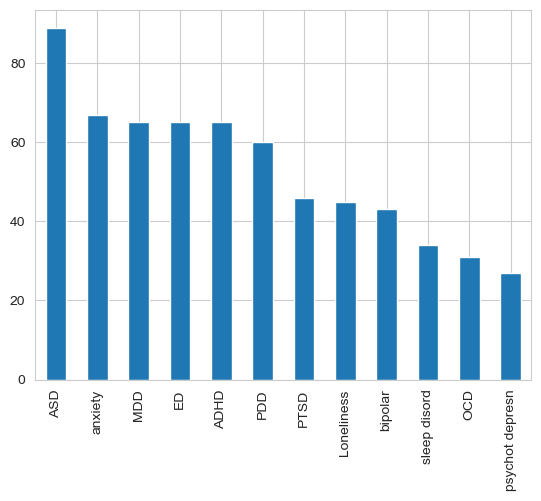

In [103]:
# Menghitung jumlah setiap kategori dalam kolom 'Disorder' menggunakan fungsi value_counts()
# Fungsi ini menghitung berapa kali masing-masing kategori muncul dalam kolom 'Disorder'
disease = data_tabular.Disorder.value_counts()

# Memvisualisasikan hasil hitungan jumlah kategori penyakit dalam bentuk grafik batang (bar plot)
# Fungsi plot.bar() membuat grafik batang dari Series yang dihasilkan oleh value_counts()
disease.plot.bar()


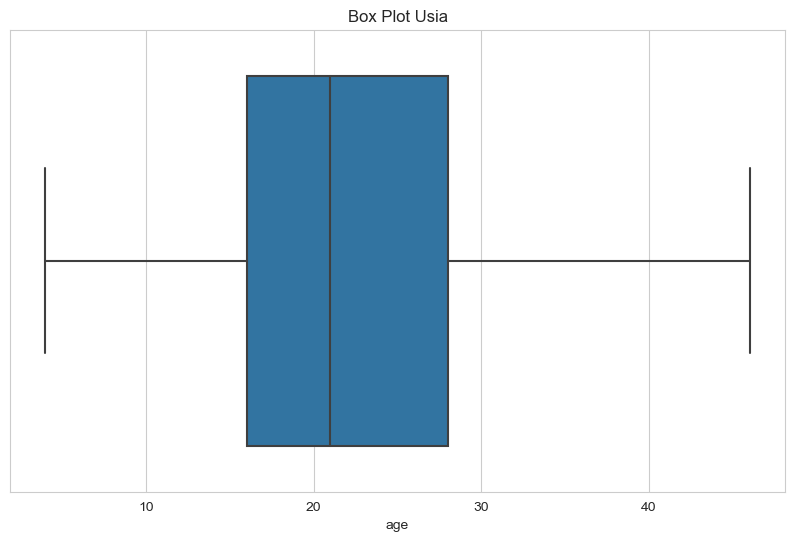

In [104]:
# Membuat box plot untuk mendeteksi outlier dalam kolom 'age'

# plt.figure(figsize=(10, 6)) digunakan untuk membuat figure baru dengan ukuran 10x6 inci
# Ini mengatur ukuran plot box plot agar lebih besar dan mudah dibaca

# sns.boxplot digunakan untuk membuat box plot dari data
# Parameter x='age' menunjukkan bahwa kita ingin memplot data dari kolom 'age'
# Parameter data=data_tabular menunjukkan bahwa 'data_tabular' adalah sumber data yang digunakan untuk plot ini

# plt.title memberikan judul pada plot agar lebih informatif
# plt.show digunakan untuk menampilkan plot di layar
plt.figure(figsize=(10, 6))
sns.boxplot(x='age', data=data_tabular)
plt.title('Box Plot Usia')
plt.show()


C:\Users\Widnyana\AppData\Local\Temp\ipykernel_27840\2729083356.py:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_tabular.corr()


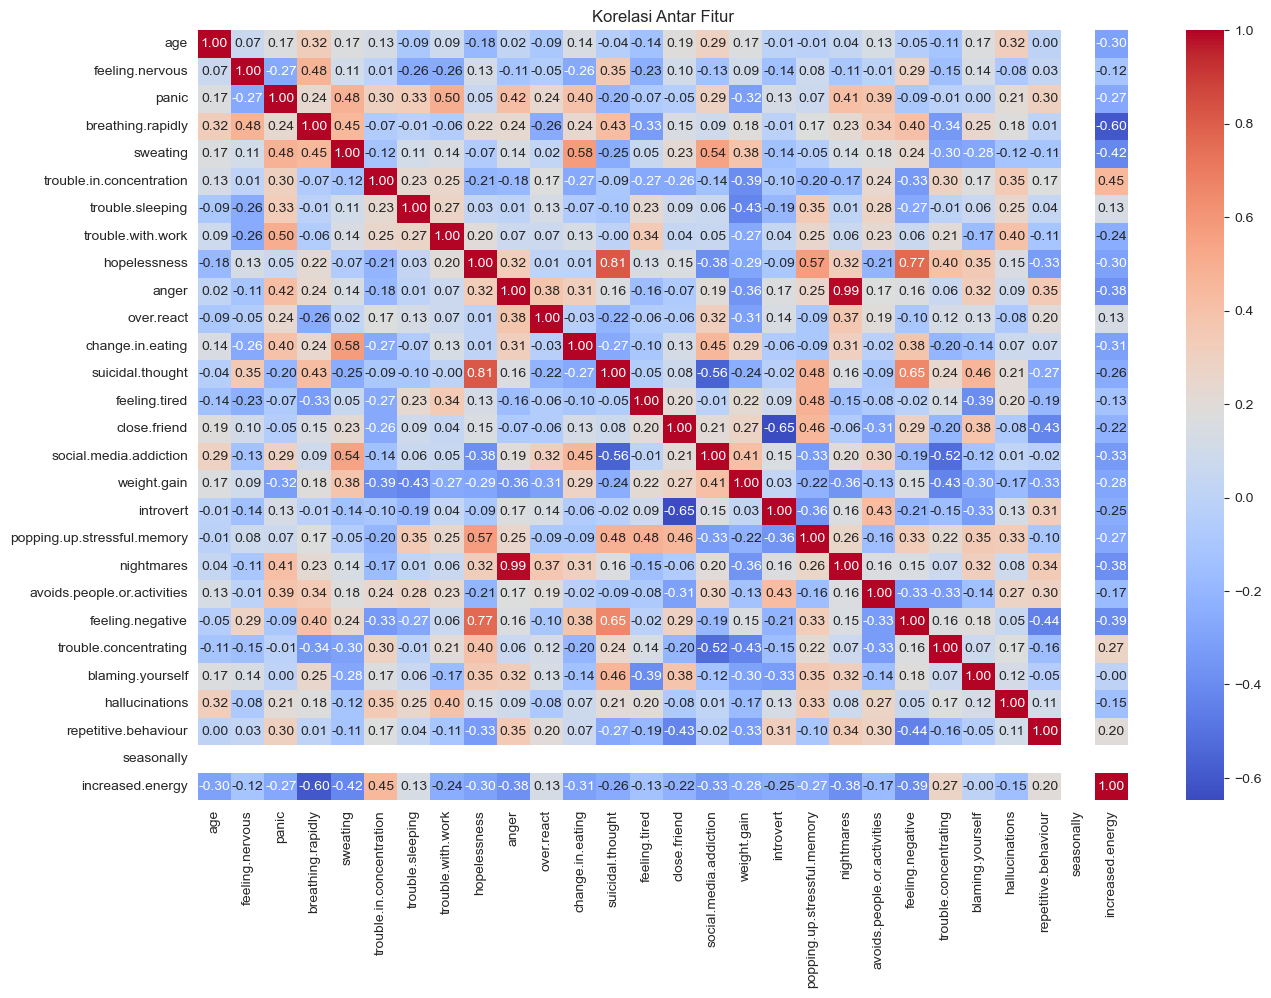

In [105]:
# Menampilkan matriks korelasi antar fitur dalam bentuk heatmap

# plt.figure(figsize=(15, 10)) digunakan untuk membuat figure baru dengan ukuran 15x10 inci
# Ini untuk mengatur ukuran plot heatmap agar lebih besar dan mudah dibaca

# data_tabular.corr() digunakan untuk menghitung matriks korelasi antar kolom numerik dalam dataframe 'data_tabular'
# Korelasi mengukur seberapa kuat hubungan antara dua variabel
# Matriks korelasi ini akan menampilkan nilai korelasi untuk setiap pasangan fitur

# sns.heatmap digunakan untuk menampilkan matriks korelasi dalam bentuk heatmap
# Parameter correlation_matrix adalah matriks korelasi yang akan divisualisasikan
# Parameter annot=True memastikan bahwa setiap sel di heatmap memiliki label nilai korelasi
# Parameter cmap='coolwarm' memberikan warna dari palet 'coolwarm', 
#    di mana warna akan menunjukkan kekuatan dan arah korelasi (warna hangat = positif, warna dingin = negatif)
# Parameter fmt='.2f' memastikan bahwa nilai korelasi ditampilkan dengan dua digit desimal

# plt.title memberikan judul pada plot agar lebih informatif
# plt.show digunakan untuk menampilkan plot heatmap di layar
plt.figure(figsize=(15, 10))
correlation_matrix = data_tabular.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Fitur')
plt.show()


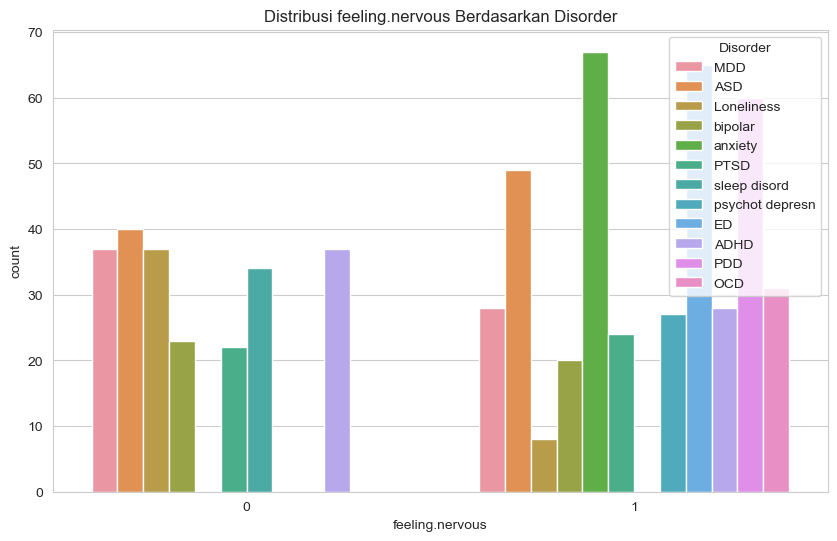

In [106]:
# Menampilkan visualisasi distribusi 'feeling.nervous' berdasarkan kategori 'Disorder' menggunakan plot batang (count plot)

# plt.figure(figsize=(10, 6)) digunakan untuk membuat sebuah figure baru dengan ukuran 10x6 inci
# Ini untuk mengatur ukuran plot agar lebih besar dan mudah dibaca

# sns.countplot digunakan untuk membuat count plot, yaitu grafik batang yang menunjukkan jumlah kemunculan setiap nilai
# Parameter x='feeling.nervous' menunjukkan bahwa sumbu x akan merepresentasikan nilai-nilai dari kolom 'feeling.nervous'
# Parameter hue='Disorder' mengelompokkan batang berdasarkan kategori dalam kolom 'Disorder'
#    (misalnya, akan menggunakan warna yang berbeda untuk tiap kategori 'Disorder')
# Parameter data=data_tabular menunjukkan dataframe sumber data yang akan dipakai untuk visualisasi

# plt.title memberikan judul pada plot agar lebih informatif
# plt.show digunakan untuk menampilkan plot di layar
plt.figure(figsize=(10, 6))
sns.countplot(x='feeling.nervous', hue='Disorder', data=data_tabular)
plt.title('Distribusi feeling.nervous Berdasarkan Disorder')
plt.show()


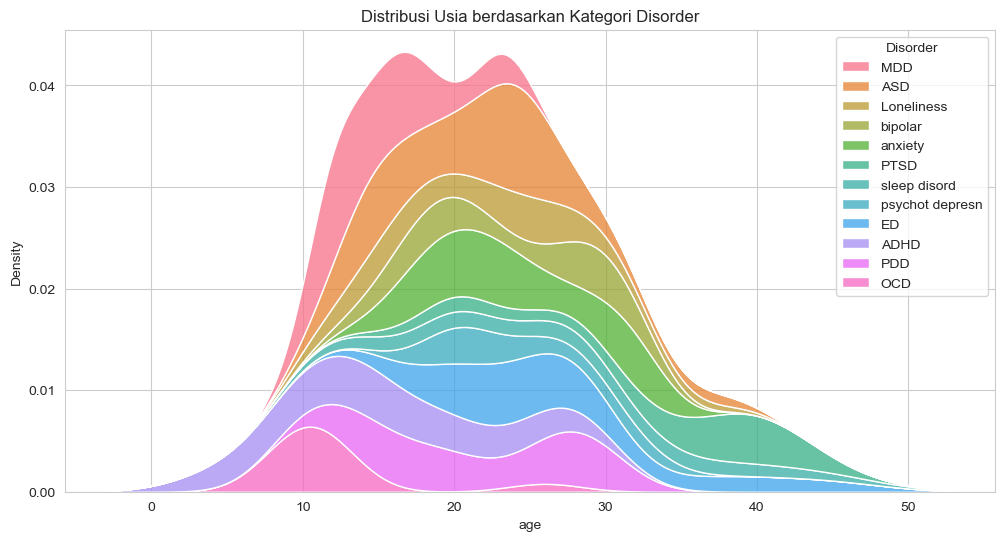

In [107]:
# Menampilkan distribusi usia berdasarkan kategori 'Disorder' menggunakan plot KDE (Kernel Density Estimate)

# plt.figure(figsize=(12, 6)) digunakan untuk membuat sebuah figure baru dengan ukuran 12x6 inci
# Ini untuk mengatur ukuran plot agar lebih lebar dan mudah dibaca

# sns.kdeplot digunakan untuk membuat plot KDE (Kernel Density Estimate)
# KDE adalah metode untuk memperkirakan distribusi data secara halus, mirip dengan histogram tetapi lebih halus
# Parameter data=data_tabular menunjukkan dataframe sumber data yang akan dipakai
# Parameter x="age" menunjukkan bahwa kita ingin memplot distribusi usia (kolom 'age')
# Parameter hue="Disorder" membuat plot dibedakan berdasarkan kategori dalam kolom 'Disorder' 
#    (misalnya, dengan warna yang berbeda untuk tiap kategori 'Disorder')
# Parameter multiple="stack" membuat distribusi dari masing-masing kategori bertumpuk satu sama lain

# plt.title digunakan untuk memberi judul pada plot agar lebih informatif
# plt.show digunakan untuk menampilkan plot di layar
plt.figure(figsize=(12, 6))
sns.kdeplot(data=data_tabular, x="age", hue="Disorder", multiple="stack")
plt.title("Distribusi Usia berdasarkan Kategori Disorder")
plt.show()


Fitur Engineering and Training Model

In [108]:
# Menghapus kolom 'Disorder' dari dataset 'data_tabular' dan menyimpannya ke dalam variabel X
# Kolom 'Disorder' adalah kolom target (label) yang telah disimpan dalam variabel y pada langkah sebelumnya,
# sehingga kita hanya membutuhkan fitur (variabel independen) untuk melatih model

# Fungsi drop digunakan untuk menghapus kolom atau baris dari dataframe
# Parameter pertama ['Disorder'] menunjukkan kolom yang ingin dihapus
# Parameter axis=1 menandakan bahwa yang akan dihapus adalah kolom, bukan baris

# Setelah menghapus kolom 'Disorder', variabel X hanya akan berisi kolom fitur (variabel independen)
# Variabel X akan digunakan sebagai input data untuk membangun dan melatih model
X = data_tabular.drop(['Disorder'], axis=1)

In [109]:
# Menyimpan kolom 'Disorder' dari dataset ke dalam variabel y
# 'Disorder' merupakan kolom target (label) yang berisi nilai atau kategori yang ingin diprediksi oleh model

# Variabel y akan berisi semua nilai dari kolom 'Disorder' pada dataset 'data_tabular'
# Variabel y ini nantinya akan digunakan sebagai label untuk membangun dan melatih model
y = data_tabular['Disorder']


In [110]:
# Membagi dataset menjadi data training dan data testing
# train_X, val_X  -> fitur (X) untuk data training dan data testing (validation)
# train_y, val_y  -> label (y) untuk data training dan data testing (validation)

# train_test_split adalah fungsi dari sklearn yang digunakan untuk membagi dataset menjadi data training dan data testing
# Parameter pertama (X) adalah data fitur (independent variables)
# Parameter kedua (y) adalah data label/target (dependent variables)

# test_size=0.15 menunjukkan proporsi data yang digunakan sebagai data testing, yaitu 15% dari total data
# Dengan demikian, 85% dari data akan digunakan sebagai data training

# random_state=42 adalah nilai acak yang digunakan agar pembagian data ini dapat direproduksi
# Dengan menetapkan random_state, pembagian dataset menjadi training dan testing akan selalu sama setiap kali kode dijalankan

# Fungsi ini mengembalikan empat variabel: 
# - train_X -> data fitur untuk training
# - val_X -> data fitur untuk testing (validation)
# - train_y -> label untuk training
# - val_y -> label untuk testing (validation)
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.15, random_state=42)


In [111]:
# Melakukan skalasi
scaler = StandardScaler()  # Inisialisasi objek StandardScaler, yang digunakan untuk menskalakan fitur data
# StandardScaler akan mengubah data agar memiliki mean 0 dan deviasi standar 1, sehingga data akan lebih seragam dan lebih mudah diproses oleh model

train_X_scaled = scaler.fit_transform(train_X)  # Melakukan fit dan transform pada data training
# fit_transform() digunakan untuk menghitung parameter skala (mean dan standar deviasi) dari data pelatihan (train_X) dan menerapkannya pada data pelatihan.
# Proses ini akan mengubah data pelatihan sehingga memiliki distribusi dengan mean = 0 dan standar deviasi = 1.

val_X_scaled = scaler.transform(val_X)  # Melakukan transform pada data testing
# transform() hanya menerapkan parameter skala yang telah dihitung sebelumnya pada data pelatihan ke data pengujian (val_X).
# Tidak menghitung ulang parameter skala karena kita ingin menggunakan skala yang sama untuk data pelatihan dan pengujian.


In [112]:
# Melakukan encoding pada label
label_encoder = LabelEncoder()  # Inisialisasi LabelEncoder
# LabelEncoder adalah alat dari scikit-learn yang digunakan untuk mengubah label kategori menjadi angka (integer).
# Misalnya, jika label adalah ['MDD', 'ASD', 'MDD'], maka LabelEncoder akan mengubahnya menjadi [0, 1, 0] (bergantung pada urutan).

train_y_encoded = label_encoder.fit_transform(train_y)  # Melakukan fit dan transform pada data training
# fit_transform() digunakan untuk pertama-tama mempelajari label dari data pelatihan (train_y) dan mengubahnya menjadi representasi integer.
# Setiap label kategori yang unik akan dipetakan ke angka integer yang berbeda.
# Sebagai contoh, jika 'MDD' dipetakan ke 0, 'ASD' dipetakan ke 1, maka label kategorikal diubah menjadi nilai numerik sesuai urutan yang ditemukan di data pelatihan.

train_y_one_hot = tf.keras.utils.to_categorical(train_y_encoded)  # Mengubah label menjadi one-hot encoding
# to_categorical() mengubah label integer (misalnya [0, 1, 0]) menjadi format one-hot encoding, yang lebih sering digunakan dalam pelatihan model klasifikasi.
# Dalam contoh ini, label [0, 1, 0] akan diubah menjadi [[1, 0], [0, 1], [1, 0]].
# Ini memastikan bahwa model akan memprediksi kelas dengan output berbentuk vektor biner di mana setiap posisi mewakili kelas yang berbeda.


In [113]:
# Inisialisasi model neural network
model = tf.keras.Sequential([ 
    # Menambahkan layer pertama (Dense layer) dengan 12 neuron
    # Activation function 'sigmoid' digunakan untuk menambah non-linearitas
    # input_shape menyatakan bahwa input memiliki jumlah fitur sebanyak 'train_X_scaled.shape[1]' (jumlah kolom dalam data pelatihan)
    tf.keras.layers.Dense(12, activation='sigmoid', input_shape=(train_X_scaled.shape[1],)) 
])

c:\Users\Widnyana\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [114]:
# Compile model
model.compile(
    # Optimizer yang digunakan adalah 'adam', yang sering digunakan dalam pelatihan model neural network karena adaptif
    optimizer='adam',
    
    # Loss function yang digunakan adalah 'binary_crossentropy', cocok untuk masalah klasifikasi dua kelas
    loss='binary_crossentropy',
    
    # Metode evaluasi model: akurasi, precision, dan recall untuk memberikan gambaran lengkap tentang kinerja model
    metrics=['accuracy', 'precision', 'recall']
)


Model Evaluation dan Validation

In [115]:
# Melakukan training model
model.fit(
    # Data pelatihan fitur (train_X_scaled) yang sudah diskalakan sebelumnya
    train_X_scaled, 
    
    # Target output (train_y_one_hot) dalam format one-hot encoding, cocok untuk klasifikasi
    train_y_one_hot, 
    
    # Menentukan jumlah epoch (200) berarti model akan melakukan 200 kali iterasi melalui seluruh data pelatihan
    epochs=200, 
    
    # Menentukan ukuran batch (8), yang berarti data akan dibagi menjadi mini-batches yang berukuran 8 untuk training
    batch_size=8, 
    
    # Mengatur level verbosity menjadi 2, yang berarti akan mencetak progress training untuk setiap epoch
    verbose=2
)

Epoch 1/200


68/68 - 1s - 10ms/step - accuracy: 0.0481 - loss: 0.8360 - precision: 0.0531 - recall: 0.3050
Epoch 2/200
68/68 - 0s - 977us/step - accuracy: 0.1405 - loss: 0.7388 - precision: 0.1107 - recall: 0.5896
Epoch 3/200
68/68 - 0s - 939us/step - accuracy: 0.3198 - loss: 0.6617 - precision: 0.1596 - recall: 0.7634
Epoch 4/200
68/68 - 0s - 942us/step - accuracy: 0.4529 - loss: 0.5998 - precision: 0.2060 - recall: 0.9094
Epoch 5/200
68/68 - 0s - 893us/step - accuracy: 0.6728 - loss: 0.5502 - precision: 0.2502 - recall: 0.9519
Epoch 6/200
68/68 - 0s - 924us/step - accuracy: 0.8651 - loss: 0.5079 - precision: 0.3020 - recall: 0.9556
Epoch 7/200
68/68 - 0s - 932us/step - accuracy: 0.9150 - loss: 0.4724 - precision: 0.3472 - recall: 0.9556
Epoch 8/200
68/68 - 0s - 1ms/step - accuracy: 0.9427 - loss: 0.4421 - precision: 0.4022 - recall: 0.9575
Epoch 9/200
68/68 - 0s - 856us/step - accuracy: 0.9501 - loss: 0.4148 - precision: 0.4896 - recall: 0.9575
Epoch 10/200
68/68 - 0s - 913us/step - accuracy: 0.9

In [116]:
# Melakukan transformasi pada data testing (validasi)
val_y_encoded = label_encoder.transform(val_y) 
# Menggunakan label encoder untuk mengubah label kategori dari data validasi (val_y) menjadi label numerik yang sesuai.
# Misalnya, jika labelnya adalah string seperti 'MDD', 'ASD', maka label encoder akan mengubahnya menjadi angka yang lebih mudah diproses oleh model.

# Mengubah label yang telah terkodekan menjadi one-hot encoding
val_y_one_hot = tf.keras.utils.to_categorical(val_y_encoded) 
# Setelah label diuji dan ditransformasi menjadi angka (encoded), kita perlu mengubahnya menjadi format one-hot encoding
# Format one-hot encoding membuat label berupa array yang memiliki nilai 1 di indeks yang sesuai dengan kelas dan 0 di lainnya.
# Misalnya, jika ada 3 kelas dan kelas yang dipilih adalah kelas ke-2, maka hasil one-hot encoding adalah [0, 1, 0].

# Melakukan evaluasi model menggunakan data validasi
loss, accuracy, precision, recall = model.evaluate(val_X_scaled, val_y_one_hot)
# Fungsi evaluate() digunakan untuk mengevaluasi kinerja model menggunakan data validasi yang sudah dipersiapkan.
# - `val_X_scaled` adalah data fitur dari set validasi yang telah diskalakan (scaled) agar sesuai dengan data training.
# - `val_y_one_hot` adalah label yang telah dikodekan dalam format one-hot untuk data validasi.
# 
# Fungsi evaluate() akan mengembalikan beberapa metrik yang telah ditentukan saat kompilasi model, yaitu:
# - `loss`: Mengukur seberapa besar error model pada data validasi berdasarkan fungsi loss yang telah dipilih (misalnya binary crossentropy).
# - `accuracy`: Persentase prediksi yang benar di seluruh data validasi.
# - `precision`: Mengukur proporsi hasil prediksi positif yang benar (positif yang sebenarnya dan benar).
# - `recall`: Mengukur proporsi kejadian positif yang berhasil ditemukan oleh model.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9909 - loss: 0.0071 - precision: 0.9909 - recall: 0.9909  


In [117]:
# Menampilkan hasil evaluasi model
print("Accuracy: ", accuracy)  # Menampilkan nilai akurasi dari hasil evaluasi model pada data validasi.
# Akurasi mengukur persentase prediksi yang benar dari seluruh prediksi yang dilakukan oleh model pada data validasi.
# Nilai akurasi yang lebih tinggi menunjukkan bahwa model lebih baik dalam memprediksi kelas yang benar.

print("Precision: ", precision)  # Menampilkan nilai precision dari hasil evaluasi model pada data validasi.
# Precision mengukur proporsi dari hasil prediksi positif yang benar-benar positif (yaitu jumlah prediksi yang benar dibagi dengan jumlah prediksi positif).
# Precision yang lebih tinggi menunjukkan bahwa model lebih akurat dalam mengidentifikasi prediksi positif yang benar, dan tidak menghasilkan banyak false positives.

print("Recall: ", recall)  # Menampilkan nilai recall dari hasil evaluasi model pada data validasi.
# Recall mengukur proporsi kejadian positif yang berhasil ditemukan oleh model (yaitu jumlah prediksi positif yang benar dibagi dengan jumlah kejadian positif sesungguhnya).
# Recall yang lebih tinggi menunjukkan bahwa model lebih baik dalam menemukan kejadian positif, meskipun mungkin menghasilkan beberapa false positives.

print("Loss: ", loss)  # Menampilkan nilai loss (kerugian) dari hasil evaluasi model pada data validasi.
# Loss (kerugian) mengukur seberapa besar perbedaan antara prediksi model dan nilai yang sebenarnya (ground truth).
# Nilai loss yang lebih rendah menunjukkan bahwa model lebih baik dalam memprediksi hasil yang mendekati nilai yang benar.
# Biasanya, loss dihitung menggunakan fungsi loss tertentu (misalnya binary crossentropy untuk masalah klasifikasi biner).


Accuracy:  0.9895833134651184
Precision:  0.9895833134651184
Recall:  0.9895833134651184
Loss:  0.006516922730952501


In [118]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Mengimpor fungsi evaluasi dari scikit-learn untuk menghitung metrik seperti akurasi, presisi, recall, dan F1-score.

# Melakukan prediksi pada data training
train_y_pred_probs = model.predict(train_X_scaled)  
# Model memprediksi probabilitas untuk setiap kelas pada data training yang telah diskalakan.
# Output berupa array 2D di mana setiap baris menunjukkan probabilitas masing-masing kelas.

train_y_pred = train_y_pred_probs.argmax(axis=1)  
# Mengambil indeks kelas dengan probabilitas tertinggi untuk setiap data sebagai hasil prediksi akhir.
# Misalnya, jika probabilitas adalah [0.2, 0.8], maka indeks kelas 1 (probabilitas 0.8) akan dipilih.

# Menghitung metrik evaluasi
train_accuracy = accuracy_score(train_y_encoded, train_y_pred)  
# Menghitung akurasi, yaitu proporsi prediksi benar dibandingkan dengan jumlah total data.

train_precision = precision_score(train_y_encoded, train_y_pred, average='weighted')  
# Menghitung presisi untuk data multi-kelas dengan metode pembobotan berdasarkan jumlah sampel di setiap kelas.
# Presisi menunjukkan proporsi prediksi positif yang benar.

train_recall = recall_score(train_y_encoded, train_y_pred, average='weighted')  
# Menghitung recall (sensitivitas) untuk data multi-kelas dengan pembobotan.
# Recall menunjukkan proporsi kejadian positif yang berhasil ditemukan oleh model.

train_f1 = f1_score(train_y_encoded, train_y_pred, average='weighted')  
# Menghitung F1-score sebagai rata-rata harmonis antara presisi dan recall dengan pembobotan.
# F1-score memberikan gambaran seimbang antara presisi dan recall.

# Menampilkan hasil
print("Metrik pada Data Training:")
# Menampilkan informasi header untuk hasil evaluasi pada data training.

print(f"Akurasi   : {train_accuracy:.4f}")  
# Menampilkan nilai akurasi dengan format desimal hingga 4 angka di belakang koma.

print(f"Presisi   : {train_precision:.4f}")  
# Menampilkan nilai presisi dengan format desimal hingga 4 angka di belakang koma.

print(f"Recall    : {train_recall:.4f}")  
# Menampilkan nilai recall dengan format desimal hingga 4 angka di belakang koma.

print(f"F1 Score  : {train_f1:.4f}")  
# Menampilkan nilai F1-score dengan format desimal hingga 4 angka di belakang koma.


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Metrik pada Data Training:
Akurasi   : 0.9815
Presisi   : 0.9843
Recall    : 0.9815
F1 Score  : 0.9812


Epoch 1/200


68/68 - 1s - 8ms/step - accuracy: 0.9815 - loss: 0.0069 - precision: 0.9815 - recall: 0.9815 - val_accuracy: 0.9896 - val_loss: 0.0064 - val_precision: 0.9896 - val_recall: 0.9896
Epoch 2/200
68/68 - 0s - 2ms/step - accuracy: 0.9815 - loss: 0.0070 - precision: 0.9815 - recall: 0.9815 - val_accuracy: 0.9896 - val_loss: 0.0064 - val_precision: 0.9896 - val_recall: 0.9896
Epoch 3/200
68/68 - 0s - 2ms/step - accuracy: 0.9815 - loss: 0.0069 - precision: 0.9815 - recall: 0.9815 - val_accuracy: 0.9896 - val_loss: 0.0064 - val_precision: 0.9896 - val_recall: 0.9896
Epoch 4/200
68/68 - 0s - 2ms/step - accuracy: 0.9815 - loss: 0.0068 - precision: 0.9815 - recall: 0.9815 - val_accuracy: 0.9896 - val_loss: 0.0064 - val_precision: 0.9896 - val_recall: 0.9896
Epoch 5/200
68/68 - 0s - 2ms/step - accuracy: 0.9815 - loss: 0.0068 - precision: 0.9815 - recall: 0.9815 - val_accuracy: 0.9896 - val_loss: 0.0064 - val_precision: 0.9896 - val_recall: 0.9896
Epoch 6/200
68/68 - 0s - 2ms/step - accuracy: 0.9815

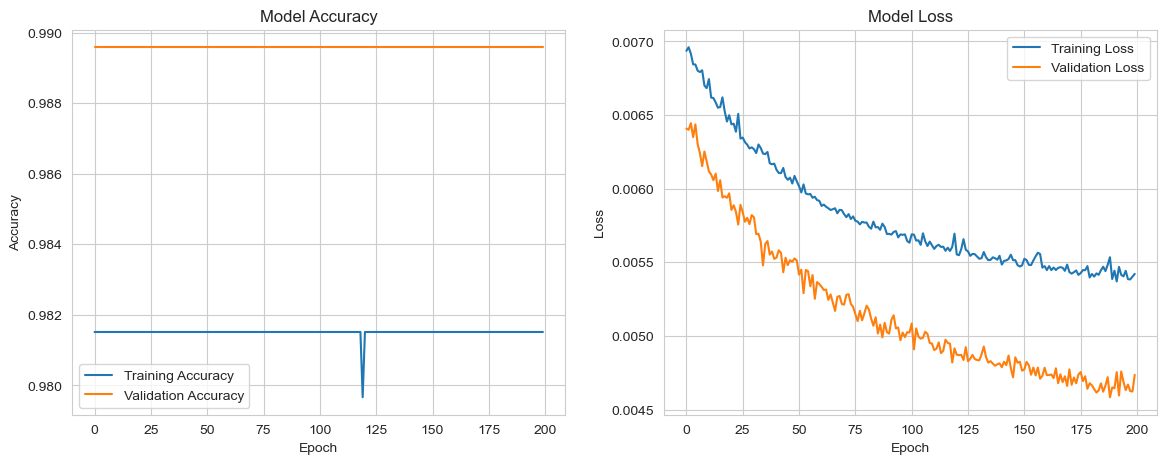

In [119]:
# Melakukan training model dengan validation data
history = model.fit(train_X_scaled, train_y_one_hot, 
                    epochs=200,  # Menentukan jumlah epoch untuk pelatihan (jumlah iterasi seluruh data pelatihan)
                    batch_size=8,  # Menentukan ukuran batch (jumlah data yang diproses dalam sekali iterasi sebelum pembaruan bobot)
                    validation_data=(val_X_scaled, val_y_one_hot),  # Menyediakan data validasi untuk mengevaluasi model pada setiap epoch
                    verbose=2)  # Mengatur tingkat verbosity (detail output) selama pelatihan: 2 berarti progress bar ditampilkan per epoch.

# Plotting training & validation accuracy values
plt.figure(figsize=(14, 5))  # Mengatur ukuran figure plot menjadi 14x5 inci, untuk menampilkan dua plot dengan ukuran yang pas.

# Plotting accuracy
plt.subplot(1, 2, 1)  # Menentukan subplot pertama (1 baris, 2 kolom, plot pertama)
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Plot akurasi pelatihan (training accuracy) selama pelatihan
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Plot akurasi validasi (validation accuracy) selama pelatihan
plt.title('Model Accuracy')  # Menambahkan judul plot untuk akurasi
plt.xlabel('Epoch')  # Menambahkan label sumbu x sebagai epoch (jumlah iterasi)
plt.ylabel('Accuracy')  # Menambahkan label sumbu y sebagai akurasi
plt.legend()  # Menampilkan legenda pada plot untuk membedakan antara training dan validation accuracy

# Plotting loss
plt.subplot(1, 2, 2)  # Menentukan subplot kedua (1 baris, 2 kolom, plot kedua)
plt.plot(history.history['loss'], label='Training Loss')  # Plot loss pelatihan (training loss) selama pelatihan
plt.plot(history.history['val_loss'], label='Validation Loss')  # Plot loss validasi (validation loss) selama pelatihan
plt.title('Model Loss')  # Menambahkan judul plot untuk loss
plt.xlabel('Epoch')  # Menambahkan label sumbu x sebagai epoch (jumlah iterasi)
plt.ylabel('Loss')  # Menambahkan label sumbu y sebagai loss
plt.legend()  # Menampilkan legenda pada plot untuk membedakan antara training dan validation loss

plt.show()  # Menampilkan plot yang telah dibuat.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


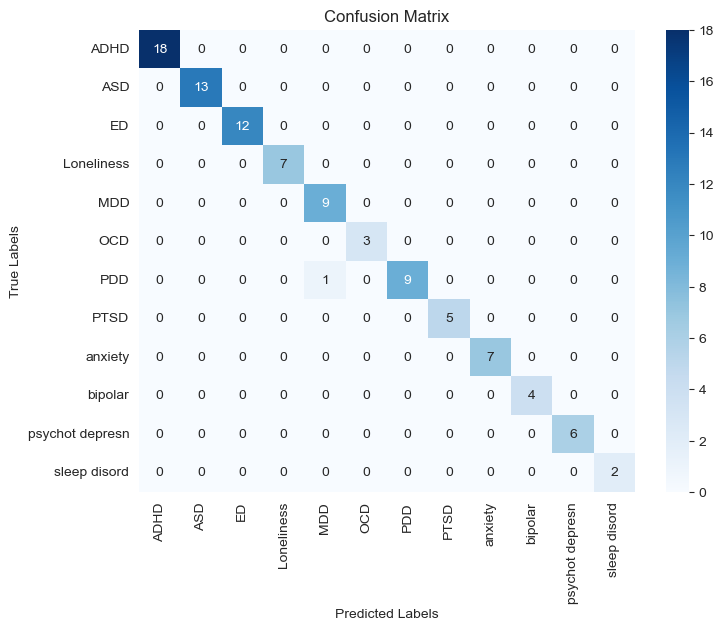

Classification Report:
                 precision    recall  f1-score   support

           ADHD       1.00      1.00      1.00        18
            ASD       1.00      1.00      1.00        13
             ED       1.00      1.00      1.00        12
     Loneliness       1.00      1.00      1.00         7
            MDD       0.90      1.00      0.95         9
            OCD       1.00      1.00      1.00         3
            PDD       1.00      0.90      0.95        10
           PTSD       1.00      1.00      1.00         5
        anxiety       1.00      1.00      1.00         7
        bipolar       1.00      1.00      1.00         4
psychot depresn       1.00      1.00      1.00         6
   sleep disord       1.00      1.00      1.00         2

       accuracy                           0.99        96
      macro avg       0.99      0.99      0.99        96
   weighted avg       0.99      0.99      0.99        96


Class: ADHD
True Positive (TP): 18
True Negative (TN): 78
Fal

In [120]:
# Mengimpor pustaka yang diperlukan
import numpy as np  # Digunakan untuk manipulasi array dan operasi numerik
import matplotlib.pyplot as plt  # Digunakan untuk visualisasi grafik
from sklearn.metrics import confusion_matrix, classification_report  # Digunakan untuk evaluasi model
import seaborn as sns  # Digunakan untuk visualisasi yang lebih estetis (misalnya heatmap)
import tensorflow as tf  # Digunakan untuk pemrosesan model deep learning

# Prediksi model pada data validasi
val_predictions = model.predict(val_X_scaled)  # Melakukan prediksi menggunakan model pada data validasi yang sudah diskalakan
val_predictions_classes = np.argmax(val_predictions, axis=1)  # Mengambil kelas dengan probabilitas tertinggi pada setiap prediksi (mendapatkan indeks kelas)

# Menghitung confusion matrix
cm = confusion_matrix(val_y_encoded, val_predictions_classes)  # Menghitung confusion matrix dengan membandingkan label asli dan label prediksi

# Visualisasi confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))  # Membuat figure untuk plot dengan ukuran 8x6 inci
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)  # Membuat heatmap dari confusion matrix
# annot=True: menampilkan angka pada setiap sel
# fmt='d': menampilkan angka dalam format desimal (integer)
# cmap='Blues': menggunakan skema warna biru
# xticklabels dan yticklabels: memberikan label kelas pada sumbu X dan Y
plt.title('Confusion Matrix')  # Menambahkan judul pada plot
plt.xlabel('Predicted Labels')  # Menambahkan label untuk sumbu X
plt.ylabel('True Labels')  # Menambahkan label untuk sumbu Y
plt.show()  # Menampilkan heatmap yang telah dibuat

# Print classification report
report = classification_report(val_y_encoded, val_predictions_classes, target_names=label_encoder.classes_)  # Menghitung dan menampilkan classification report
# classification_report: menampilkan precision, recall, f1-score untuk setiap kelas
print("Classification Report:")  # Menampilkan header "Classification Report:"
print(report)  # Menampilkan hasil classification report pada konsol

# Menghitung TP, TN, FP, FN untuk setiap kelas
tp = np.diag(cm)  # True Positives: mengambil nilai diagonal dari confusion matrix, yaitu jumlah prediksi benar untuk tiap kelas
fp = cm.sum(axis=0) - tp  # False Positives: menghitung FP dengan menjumlahkan setiap kolom dan menguranginya dengan TP
fn = cm.sum(axis=1) - tp  # False Negatives: menghitung FN dengan menjumlahkan setiap baris dan menguranginya dengan TP
tn = cm.sum() - (fp + fn + tp)  # True Negatives: menghitung TN dengan total semua elemen dikurangi FP, FN, dan TP

# Menampilkan TP, TN, FP, FN untuk setiap kelas
for i, class_name in enumerate(label_encoder.classes_):  # Melakukan iterasi untuk setiap kelas
    print(f"\nClass: {class_name}")  # Menampilkan nama kelas
    print(f"True Positive (TP): {tp[i]}")  # Menampilkan jumlah True Positives untuk kelas ke-i
    print(f"True Negative (TN): {tn[i]}")  # Menampilkan jumlah True Negatives untuk kelas ke-i
    print(f"False Positive (FP): {fp[i]}")  # Menampilkan jumlah False Positives untuk kelas ke-i
    print(f"False Negative (FN): {fn[i]}")  # Menampilkan jumlah False Negatives untuk kelas ke-i


Save model

In [121]:
# Mengimpor pustaka yang diperlukan
import tensorflow as tf  # Digunakan untuk bekerja dengan model deep learning (Neural Networks)
import pickle  # Digunakan untuk menyimpan objek Python ke dalam file dan memuatnya kembali

# Menyimpan model neural network dalam format Keras Native
model.save("mental_disorder_model.keras")  # Menyimpan model neural network yang telah dilatih ke dalam file dengan ekstensi .keras
# Model ini dapat dimuat kembali nanti untuk digunakan untuk prediksi atau evaluasi tanpa perlu melatih ulang.
    
# Menyimpan label encoder
with open("label_encoder.pkl", "wb") as le_file:  # Membuka file "label_encoder.pkl" dalam mode tulis biner ("wb")
    pickle.dump(label_encoder, le_file)  # Menyimpan objek label_encoder (encoder untuk label) ke dalam file
# Label encoder ini digunakan untuk mengonversi label kategorikal menjadi angka dan sebaliknya.

# Menyimpan scaler
with open("scaler.pkl", "wb") as scaler_file:  # Membuka file "scaler.pkl" dalam mode tulis biner ("wb")
    pickle.dump(scaler, scaler_file)  # Menyimpan objek scaler (misalnya, MinMaxScaler atau StandardScaler) ke dalam file
# Scaler digunakan untuk menskalakan data input sebelum diberi ke model, dan penting untuk konsistensi ketika model digunakan kembali.

# Menampilkan pesan untuk menandakan bahwa penyimpanan berhasil
print("Model, Label Encoder, dan Scaler telah berhasil disimpan.")  # Menampilkan pesan yang mengonfirmasi bahwa model, encoder, dan scaler telah disimpan dengan sukses


Model, Label Encoder, dan Scaler telah berhasil disimpan.


In [122]:
import json

model_json = model.to_json()  # Menyimpan arsitektur model
with open("mental_disorder_model.json", "w") as json_file:
    json.dump(model_json, json_file)
    
# Menyimpan Label Encoder ke JSON
label_encoder_data = {
    "classes": label_encoder.classes_.tolist()
}
with open("label_encoder.json", "w") as le_file:
    json.dump(label_encoder_data, le_file)

# Menyimpan Scaler ke JSON
scaler_data = {
    "mean": scaler.mean_.tolist(),
    "scale": scaler.scale_.tolist(),
    "var": scaler.var_.tolist()  # Varians jika diperlukan
}
with open("scaler.json", "w") as scaler_file:
    json.dump(scaler_data, scaler_file)
    
# Menyimpan bobot model ke file HDF5
model.save_weights("mental_disorder.weights.h5")
